In [1]:
from os.path import join, abspath
from os import getcwd

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [37]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
data_dir = abspath(join(getcwd(), '../../'))

In [4]:
# load covariance analysis
with open(data_dir + '/models/results/covariance_analysis/sensilla_covariance.pickle', 'rb') as file:
    results = pickle.load(file)
cov_mat = results['covariance']
evecs = results['evecs']
evals = results['evals']

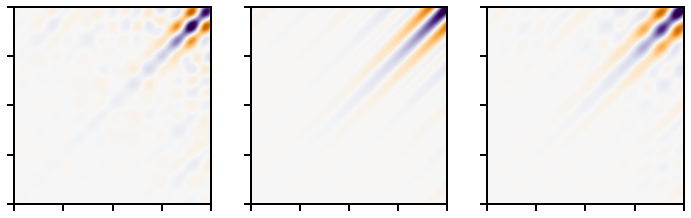

In [5]:
# plot the covariance matrices
keys = ['data', 'model', 'finite']
fig = plt.figure(figsize=(12, 4))
for i, key in enumerate(cov_mat.keys()):
    ax = fig.add_subplot(1, 3, i+1)
    plt.imshow(np.flip(cov_mat[key], axis=0), cmap='PuOr')
    plt.clim(-5, 5)
    plt.xticks([0, 400, 800, 1200, 1600])
    plt.yticks([0, 400, 800, 1200, 1600])
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis = 'both', which = 'major', direction='out',length=7)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_3/covmat_sensilla.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches = 0.02)

# save the colorbar separately
# fig, ax = plt.subplots(figsize=(8, 4))
# cbar = plt.colorbar(plot, ax=ax)
# cbar.set_ticks([])
# ax.remove()
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_3/covmat_colorbar.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0)

[Text(0, 0, ''),
 Text(3, 0, ''),
 Text(6, 0, ''),
 Text(9, 0, ''),
 Text(12, 0, ''),
 Text(15, 0, '')]

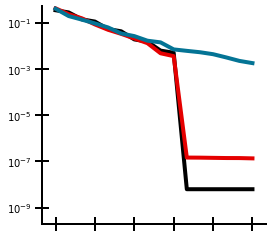

In [55]:
# plot the eigenvalues
t = 16
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.semilogy(np.flip(evals['model'])[:t], '-', lw=4, c='#000000', alpha=1)
plt.semilogy(np.flip(evals['finite'])[:t], '-', lw=4, c='#e50000', alpha=1)
plt.semilogy(np.flip(evals['data'])[:t], '-', lw=4, c='#047495', alpha=1)
# plt.ylabel('Variance')
# plt.xlabel('PC dimension')

# format ticks
plt.xlim(-1, 16)
plt.yticks([1E-9, 1E-7, 1E-5, 1E-3, 1E-1])
plt.ylim(2E-10, 5E-1)
# plt.ylim(-0.03, 0.45)
# plt.yticks(np.arange(0, 0.5, 0.1))
plt.xticks(np.arange(0, 16, 3))
ax.set_xticklabels([])
# ax.set_yticklabels([])

# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_3/evals_sensilla.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0)

In [ ]:
# plot eigenvecs
p = [-1, 1, -1, -1, 1, 1] # multiplicative factor to flip signs
fig = plt.figure(figsize=(10.85, 5))
for i in range(6):
    ax = fig.add_subplot(3, 6, i+1)
#     ax.set_title(i)
    plt.plot(evecs['data'][:, -i - 1] , lw=2, c='#047495')
    plt.axis('off')
    
    ax = fig.add_subplot(3, 6, 6 + i +1)
    plt.plot(evecs['model'][:, -i - 1] * p[i], lw=2, c='#000000')
    plt.axis('off')
    
    ax = fig.add_subplot(3, 6, 12 + i +1)
    plt.plot(evecs['finite'][:, -i - 1] * p[i], lw=2, c='#e50000')
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_3/evecs_sensilla.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches = 0)

print('Explained variance {:0.2f}'.format(np.sum(evals['data'][-5:])))

In [ ]:
2.17 * 5